In [2]:
import matplotlib.pyplot as plt
import numpy as np
import json
import os
from utils import read_file_as_json

import matplotlib.pyplot as plt
import numpy as np

In [2]:
results_folder = 'output'

In [15]:
method_similarity = {
    1: [],
    2: [],
    3: [],
    4: [],
    5: [],
    6: [],
    7: []
}

similarities = {
    1: {'count': 0, 'total': 0, 'avg': 0, 'under50': 0, 'over50': 0, 'over80': 0},
    2: {'count': 0, 'total': 0, 'avg': 0, 'under50': 0, 'over50': 0, 'over80': 0},
    3: {'count': 0, 'total': 0, 'avg': 0, 'under50': 0, 'over50': 0, 'over80': 0},
    4: {'count': 0, 'total': 0, 'avg': 0, 'under50': 0, 'over50': 0, 'over80': 0},
    5: {'count': 0, 'total': 0, 'avg': 0, 'under50': 0, 'over50': 0, 'over80': 0},
    6: {'count': 0, 'total': 0, 'avg': 0, 'under50': 0, 'over50': 0, 'over80': 0},
    7: {'count': 0, 'total': 0, 'avg': 0, 'under50': 0, 'over50': 0, 'over80': 0}
}

methods_with_dashes = []
multiple_methods = []

In [16]:
def display_method_similarities_after_extractions(extractions):
    method_similarities = sorted(method_similarity[extractions], key = lambda x: x['similarity'])
    method_names = [x['name'] for x in method_similarities]
    x_method_names = np.arange(len(method_names))
    y_similarities = [x['similarity'] for x in method_similarities]

    extractions_word = ""
    if (extractions == 1): extractions_word = "one"
    elif (extractions == 2): extractions_word = "two"
    elif (extractions == 3): extractions_word = "three"
    elif (extractions == 4): extractions_word = "four"
    elif (extractions == 5): extractions_word = "five"
    elif (extractions == 6): extractions_word = "six"

    plt.figure(figsize=(11, 7))

    plt.bar(x_method_names, y_similarities)
    plt.xlabel('Methods')
    plt.ylabel('Similarity after ' + extractions_word + ' extractions')
    plt.title('Similarity Scores')

    plt.xticks(x_method_names, method_names, rotation='vertical', fontsize=8)

    percentiles = [25, 50, 75]  # Percentile values
    percentiles_name = ['Q1', 'Q2', 'Q3']  # Percentile values
    for i in range(3):
        value = np.percentile(y_similarities, percentiles[i])  # Calculate the percentile value
        plt.text(0, value, percentiles_name[i], color='red', ha='right', va='bottom')  # Add text to the line
        plt.axhline(value, color='red', linestyle='--', linewidth=1)  # Add a horizontal line

    plt.tight_layout() 

    plt.show(block=True)

In [17]:
for file_name in os.listdir(results_folder):
    file = read_file_as_json(results_folder + '/' + file_name)

    if 'original' not in file:
        continue
    if 'predictions' not in file['original']:
        continue
    if (len(file['original']['predictions']) > 0):
        for p in file['original']['predictions']:
            if ('_' in p):
                methods_with_dashes.append(
                    {'name': file['original']['method_name'], 'predictions': file['original']['predictions']
                     })
            if (',' in p):
                multiple_methods.append(
                    {'name': file['original']['method_name'], 'predictions': file['original']['predictions']
                     })

    if 'similarities' not in file['original']:
        continue

    file_similarities = file['original']['similarities']
    if (len(similarities) <= 0):
        continue

    for i in range(len(file_similarities)):
        similarity_entry = similarities[i+1]
        method_similarity_entry = method_similarity[i+1]
        method_similarity_entry.append({'name': file['original']['method_name'], 
                                        'similarity': file_similarities[i]})
        similarity_entry['count'] += 1
        similarity_entry['total'] += file_similarities[i]
        if (file_similarities[i] >= 0.5): 
            similarity_entry['over50'] += 1
            if (file_similarities[i] >= 0.8): similarity_entry['over80'] += 1
        elif (file_similarities[i] < 0.5): similarity_entry['under50'] += 1

for s in similarities:
    if (similarities[s]['count'] == 0):
        continue
    similarities[s]['avg'] = similarities[s]['total'] / \
        similarities[s]['count']

In [18]:
print('Similarities:')
print(json.dumps(similarities, indent=4))

print('Multiple predictions: (' + str(len(multiple_methods)) + ')')
print(json.dumps(multiple_methods, indent=4))

print('Method with dashes: (' + str(len(methods_with_dashes)) + ')')
print(json.dumps(methods_with_dashes, indent=4))

print('Method with similarities: (' + str(len(method_similarity)) + ')')
print(json.dumps(method_similarity, indent=4))

Similarities:
{
    "1": {
        "count": 111,
        "total": 92.36054401136553,
        "avg": 0.8320769730753652,
        "under50": 8,
        "over50": 103,
        "over80": 82
    },
    "2": {
        "count": 111,
        "total": 89.43081114718609,
        "avg": 0.8056829833079828,
        "under50": 12,
        "over50": 99,
        "over80": 74
    },
    "3": {
        "count": 27,
        "total": 21.72582560522464,
        "avg": 0.8046602076009125,
        "under50": 2,
        "over50": 25,
        "over80": 17
    },
    "4": {
        "count": 8,
        "total": 6.716221373042236,
        "avg": 0.8395276716302795,
        "under50": 1,
        "over50": 7,
        "over80": 6
    },
    "5": {
        "count": 1,
        "total": 1.0,
        "avg": 1.0,
        "under50": 0,
        "over50": 1,
        "over80": 1
    },
    "6": {
        "count": 1,
        "total": 1.0,
        "avg": 1.0,
        "under50": 0,
        "over50": 1,
        "over80": 1
    

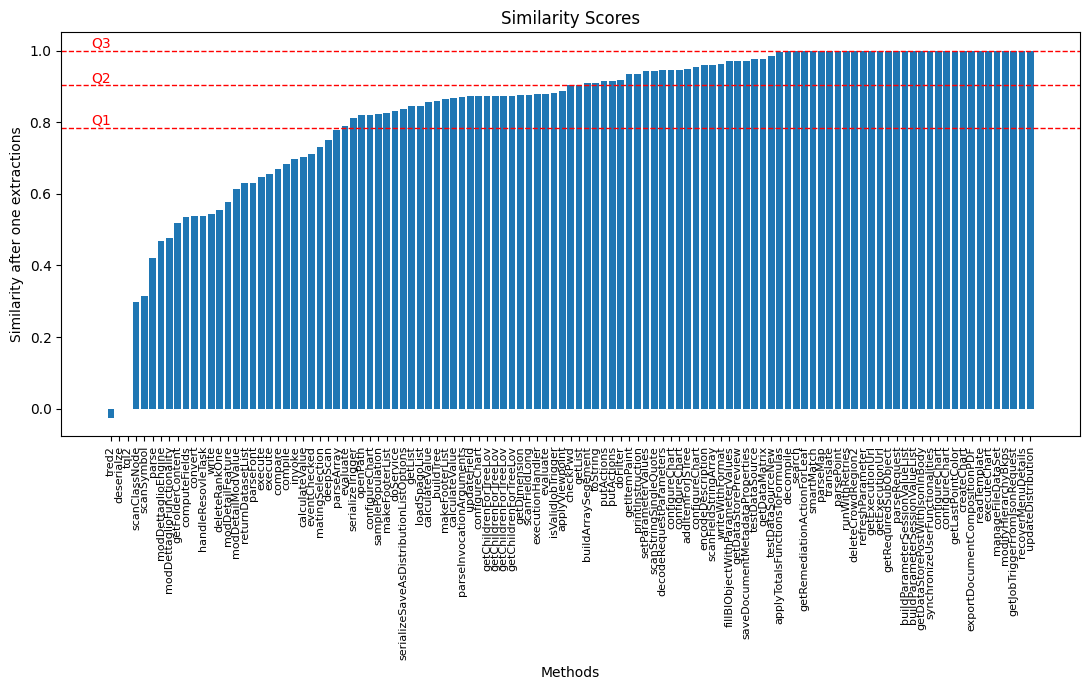

In [8]:
display_method_similarities_after_extractions(1)

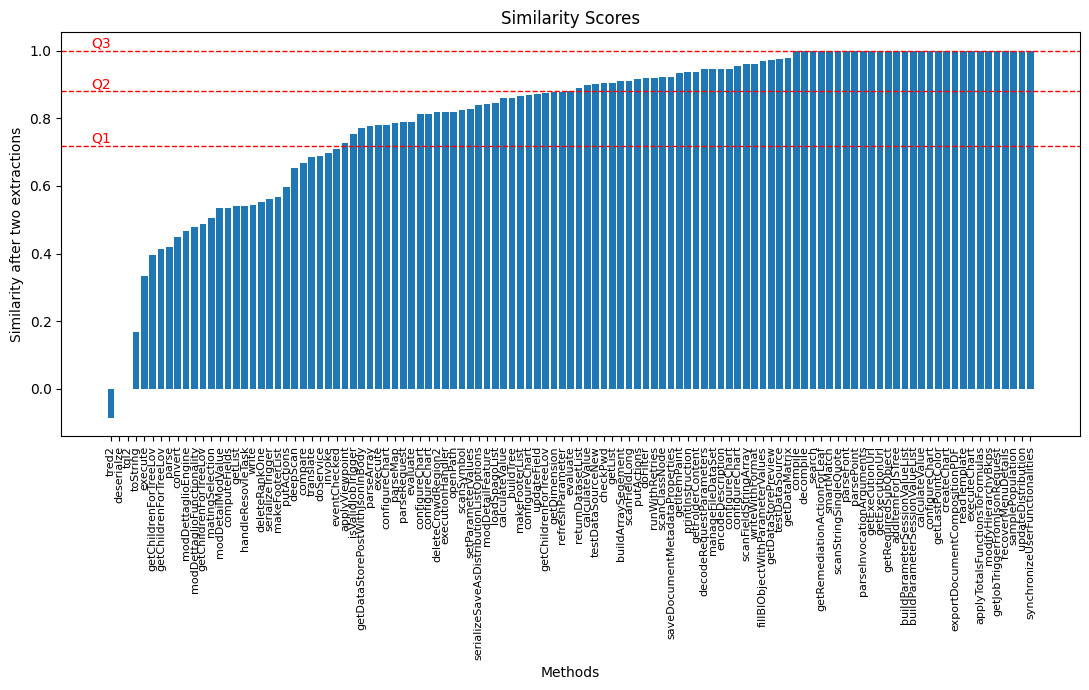

In [9]:
display_method_similarities_after_extractions(2)

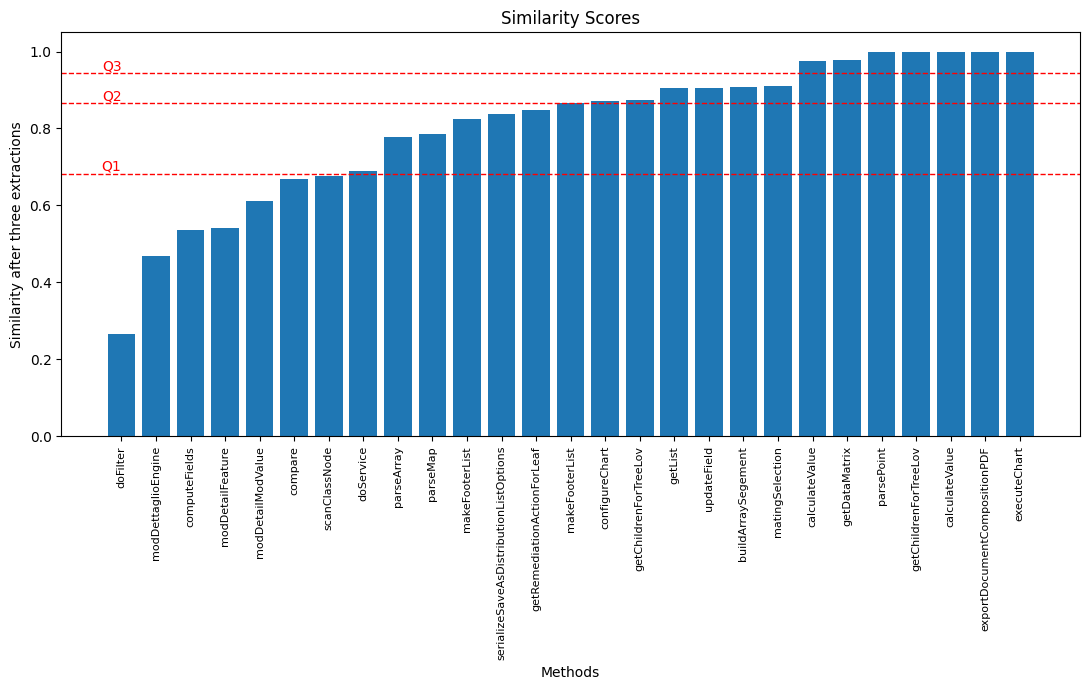

In [10]:
display_method_similarities_after_extractions(3)

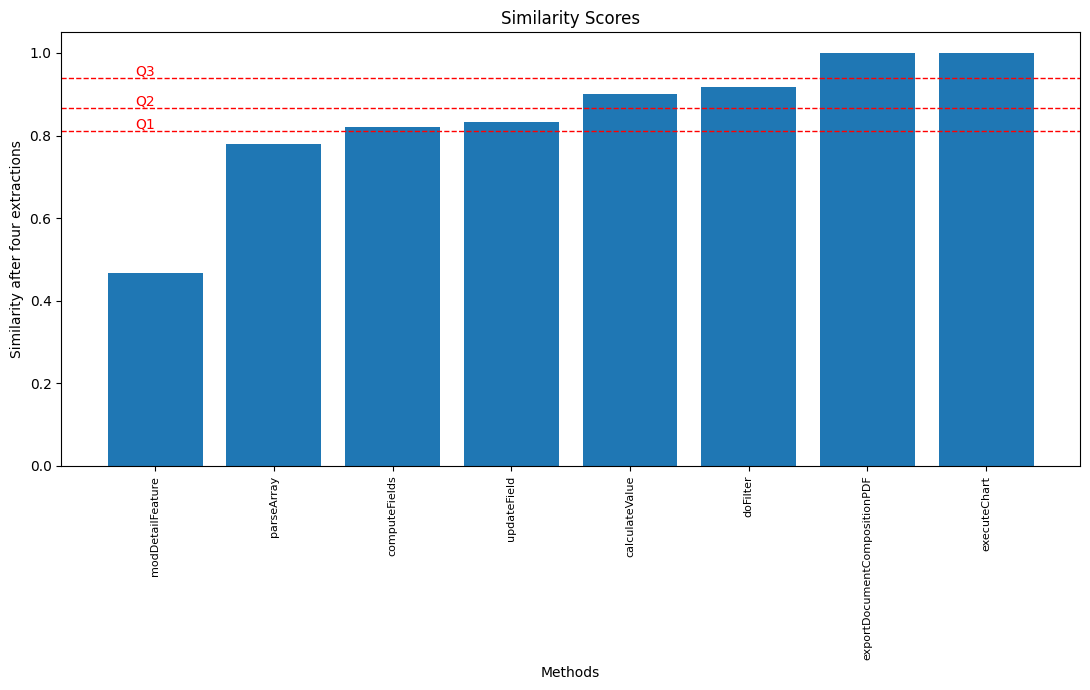

In [11]:
display_method_similarities_after_extractions(4)

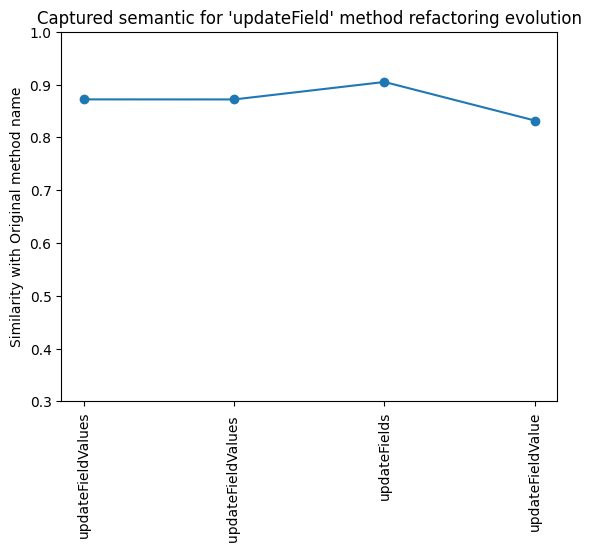

In [19]:
methods = ['updateFieldValues', 'updateFieldValues ', 'updateFields', 'updateFieldValue']
similarity_values = [0.872, 0.8719, 0.905, 0.832]

plt.plot(methods, similarity_values, marker='o')

plt.ylabel('Similarity with Original method name')
plt.title('Captured semantic for \'updateField\' method refactoring evolution')
plt.ylim(0.3, 1)

plt.xticks(rotation='vertical')

plt.show()


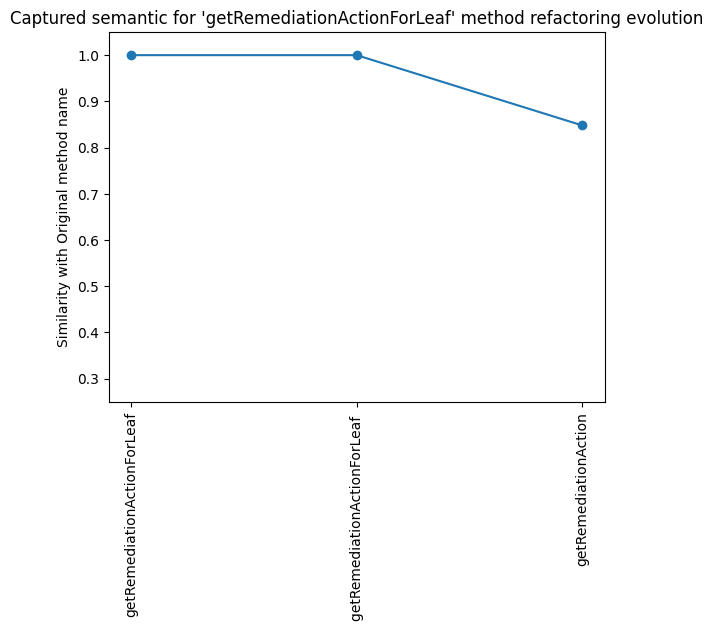

In [20]:
methods = ['getRemediationActionForLeaf', 'getRemediationActionForLeaf ', 'getRemediationAction']
similarity_values = [1, 1, 0.848]

plt.plot(methods, similarity_values, marker='o')

plt.ylabel('Similarity with Original method name')
plt.title('Captured semantic for \'getRemediationActionForLeaf\' method refactoring evolution')
plt.ylim(0.25, 1.05)

plt.xticks(rotation='vertical')

plt.show()